# Урок 6. Многоклассовая классификация.

Посмотрим на примере алгоритма логистической регрессии и метода опорных векторов, как работать с различными методами многоклассовой классификации.

### 1.
Вспомните датасет Wine. Загрузите его, разделите на тренировочную и тестовую выборки (random_state=17), используя только [9, 11, 12] признаки.

In [12]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [21]:
### YOUR CODE HERE ###
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df[[df.columns[8], df.columns[10], df.columns[11]]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Задайте тип кросс-валидации с помощью StratifiedKFold: 5-кратная, random_state=17.**

In [23]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [29]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(X_train, y_train)

5

### 2.
Обучите логистическую регрессию (LogisticRegression) с параметром C по умолчанию и random_state=17. Укажите гиперпараметр multi_class='ovr' - по умолчанию многие классификаторы используют именно его. С помощью cross_val_score сделайте кросс-валидацию (используйте объект skf) и выведите среднюю долю правильных ответов на ней (используйте функцию mean). Отдельно выведите долю правильных ответов на тестовой выборке.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
### YOUR CODE HERE ###
lr = LogisticRegression(multi_class='ovr', random_state=42)
print(f'Средняя доля правильных ответов равна {round(cross_val_score(lr, X_train, y_train, cv=skf).mean(), 3)}')

lr.fit(X_train, y_train)
print(f'Доля правильных ответов на тестовой выборке равна {round(lr.score(X_test, y_test), 3)}')

Средняя доля правильных ответов равна 0.707
Доля правильных ответов на тестовой выборке равна 0.667


### 3.
Обучите метод опорных векторов (SVC) с random_state=17 и остальными параметрами по умолчанию. Этот метод при мультиклассовой классификации также использует метод "ovr". Сделайте кросс-валидацию (используйте skf) и, как и в предыдущем пункте, выведите среднюю долю правильных ответов на ней. Отдельно выведите долю правильных ответов на тестовой выборке.

In [35]:
from sklearn.svm import SVC

In [37]:
### YOUR CODE HERE ###
svc = SVC(random_state=42)
print(f'Средняя доля правильных ответов равна {round(cross_val_score(svc, X_train, y_train, cv=skf).mean(), 3)}')

svc.fit(X_train, y_train)
print(f'Доля правильных ответов на тестовой выборке равна {round(svc.score(X_test, y_test), 3)}')

Средняя доля правильных ответов равна 0.706
Доля правильных ответов на тестовой выборке равна 0.644


Как видно из полученной метрики, на тестовой выборке метод с гиперпараметрами по умолчанию работает явно намного хуже логистической регрессии. В целом, SVM достаточно плохо масштабируется на размер обучающего набора данных (как видно, даже с тремя признаками он работает не очень хорошо), но благодаря возможности выбора различных ядер (функций близости, которые помогают разделять данные) и другим гиперпараметрам SVM можно достаточно точно настроить под определенный вид данных. Подробнее на этом останавливаться в контексте данного урока не будем.

### 4.
Для предсказаний обеих моделей постройте матрицу ошибок (confusion matrix) и напишите, какие классы каждая из моделей путает больше всего между собой.

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix

LR плохо отделяет class_0 от class_1, периодически путает class_1 с остальными и отлично выделяет class_2
SVC допускает ошибки по всем классам, лучше всего выделяя class_2.

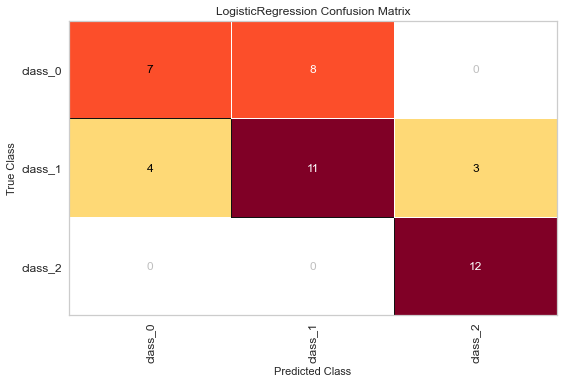

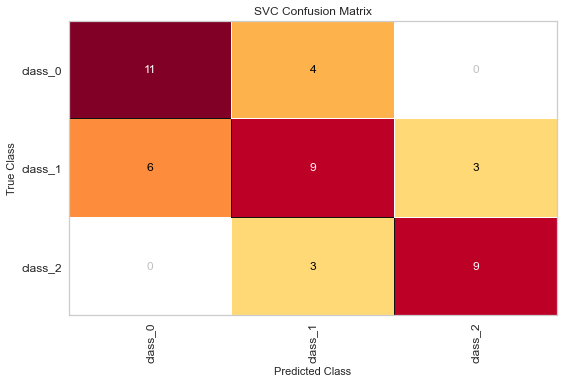

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [45]:
### YOUR CODE HERE ###

cm = ConfusionMatrix(lr, classes=data.target_names)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

cm = ConfusionMatrix(svc, classes=data.target_names)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

### 5.
Для каждой модели выведите classification report.

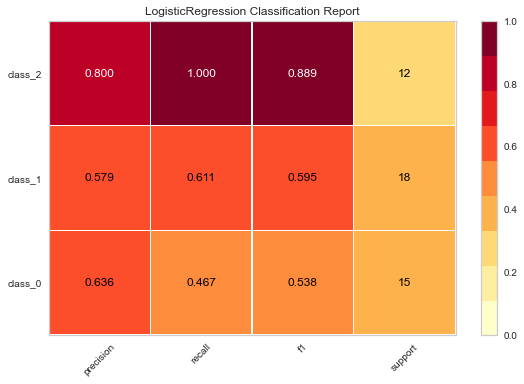

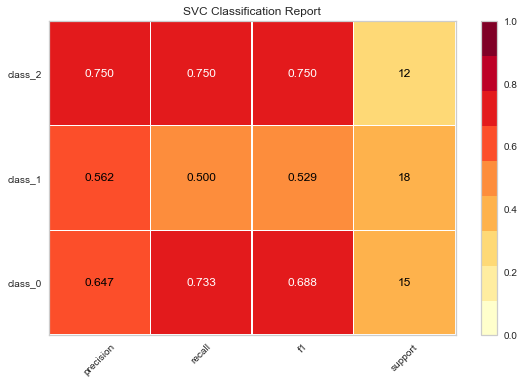

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [43]:
### YOUR CODE HERE ###

cr = ClassificationReport(lr, classes=data.target_names, support=True)
cr.fit(X_train, y_train)        
cr.score(X_test, y_test)        
cr.show()  

cr = ClassificationReport(svc, classes=data.target_names, support=True)
cr.fit(X_train, y_train)        
cr.score(X_test, y_test)        
cr.show()  




